# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [43]:
import numpy as np
from scipy import optimize 
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject


%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import ipywidgets as widgets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We first define the model 

In [109]:
m = 1 
v = 10
eps = 0.1
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w = 0.5

def utility(c, v, l, e):
    u = np.log(c) - v*(l**(1+1/e)/(1+1/e))
    return u

#1.d. Defining constraints
def constraint(m, l, w, t0, t1, k):
    x = m+w*l-w*l*t0-t1*max((w*l-k),0)
    return x

#1.e. Objective function to minimize
def value_of_choice(l,w,e,v, t0, t1, k):
    c = constraint(m, l, w, t0, t1, k)
    return -utility(c, v, l, e)

#1.f. define a solver
def solver(m, w, e, v, t0, t1, k):
    sol_case1 = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(w,e,v,t0,t1,k))
    l_best = sol_case1.x
    c_best = constraint(m,l_best, w, t0, t1, k)
    u_best = utility(c=c_best, v=v, l=l_best, e=e)
    return l_best, c_best, u_best

l_best, c_best, u_best = solver(m = m, w = w, e = e,v = v,t0 = t0,t1 = t1,k = k)
# f. print resultat

print(f'When optimizing the function we find the optimal labour supply to be {l_best:.3f}' , f'and the optimal consumption {c_best:.3f}' f' which gives us a utility of {u_best:.3f}.')
   

When optimizing the function we find the optimal labour supply to be 0.339 and the optimal consumption 1.102 which gives us a utility of 0.076.


# Question 2

ADD ANSWER.

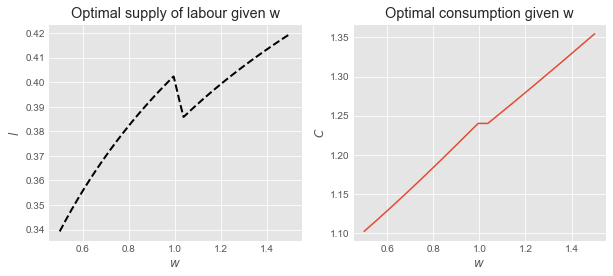

In [110]:

# 2.a. define storage vectors and data for w.
N = 1000
w_vec = np.linspace(0.5, 1.5, N)
l_vec = np.empty(N)
c_vec = np.empty(N)

# 2.b. loop through different w and get optima of l and c for each w in w_vec
for i, w in enumerate(w_vec):
    bundle = solver(w = w,e = 0.3,v = v,t0 = t0,t1 = t1,k = k,m = m)
    l_vec[i] = bundle[0]
    c_vec[i] = bundle[1]

# 2.c. plotting figure.
fig = plt.figure(figsize=(10,4)) # dpi = dots-per-inch (resolution)

ax_left = fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,ls='--',lw=2,color='black',label='Labour')

#2.c.1 left figure is labour supple
ax_left.set_title('Optimal supply of labour given w')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l$')
ax_left.grid(True)

#2.c.2 right figure is consumption
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given w')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$C$')
ax_right.grid(True)
plt.show()


# Question 3

ADD ANSWER.

In [108]:
N = 10000 
np.random.seed(100)
w_list = np.random.uniform(low=0.5,high=1.5,size=N)

#we'll now define a tax revenue function, which will reuse the values for w and l from above
def tax_revenue(w_vec,l_best,t0,t1,k):
    revenue = np.sum(t0*w_vec*l_best + t1*np.maximum(w_vec*l_best-k,0))
    return revenue

# Printing the value of the tax revenue
print(f'Sum of the tax revenue: {tax_revenue(w_vec,l_best,t0,t1,k):.2f}')

# Question 4

ADD ANSWER.

In [5]:
 e2 = 0.1

# We rename the empty tuples such that we do not overwrite the previous stated tuples
c_1_values=np.empty(N)
l_1_values=np.empty(N)
w_1_values=np.empty(N)

# Reusing code from question 2
def u_func(c,l):
    return np.log(c) - (v * (l**(1+1/e2))/(1+1/e2))

def value_of_choice(l,m,v,e2,t0,t1,k,w):
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))
    return -u_func(c,l)

for i,w in enumerate(np.linspace(0.5,1.5,10000)):

    solver = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,v,e2,t0,t1,k,w))

    l = solver.x
    c = m+w*l-(t0*w*l+t1*np.maximum(w*l-k,0))

    c_1_values[i] = c
    l_1_values[i] = l
    w_1_values[i] = w
    

def tax_revenue_1(w_1_values,l_1_values,t0,t1,k):
    revenue = np.sum(t0*w_1_values*l_1_values + t1*np.maximum(w_1_values*l_1_values-k,0))
    return revenue

print(f'Sum of the tax revenue: {tax_revenue_1(w_1_values,l_1_values,t0,t1,k):.2f}')

# Question 5

ADD ANSWER.

In [91]:
# 5.a. value of choice function to minize
def value_of_choice(x,w):
    t0_best = x[0]
    t1_best = x[1]
    k = x[2]
    l = x[3]
    return -revenue

# b. constraints (violated if negative) and bounds
constraints = ({'type': 'ineq', 'fun': lambda x: c_vec-(m+w*x[3]-(x[0]*w*x[3] + (x[1]*np.max(w*x[3]-x[2],0))))}) 
bounds = ((0,1),(0,1),(0,1),(0,1))


# c. call solver
initial_guess = [0.3,0.2,0.5,0.2]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(i),
    method='SLSQP',bounds=bounds,constraints=constraints)

# Print solution 
def print_solution1(t0_best,t1_best,k,l):
    print(f'tax0 = {t0_best:.8f}')
    print(f'tax1 = {t1_best:.8f}')
    print(f'k  = {k:.8f}')
    print(f'l  = {l:.8f}')

# d. unpack solution
t0_best = sol_case2.x[0]
t1_best = sol_case2.x[1]
k = sol_case2.x[2]
l = sol_case2.x[3]
print_solution1(t0_best,t1_best,k,l)

C:\Users\Frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


# Conclusion

By using Python we have solved the consumers maximization problem. 

Plotting the optimal consumption and labour given wages between 0.5 and 1.5 shows that there is a break in the labour supply curve. 

In question 3 and 4 we can conclude that when the elasticity of labour drecreases, the tax revenue increases. When the consumers do not substitute labour as much as before, the tax base increase which all things equal leads to a higher tax revenue. 